In [1]:
import pandas as pd

df_raw = pd.read_csv('data/pm25_hourly_raw', low_memory=False)

df_raw.shape

(635159, 31)

In [2]:
# site_id clean up

df_raw['state_code'] = df_raw['state_code'].astype(str).str.zfill(2)
df_raw['county_code'] = df_raw['county_code'].astype(str).str.zfill(3)
df_raw['site_number'] = df_raw['site_number'].astype(str).str.zfill(4)

df_raw['site_id'] = (
    df_raw['state_code'] + '-' +
    df_raw['county_code'] + '-' +
    df_raw['site_number'] + '-' +
    df_raw['poc'].astype(str)
)

df_raw['datetime'] = pd.to_datetime(df_raw['date_gmt'] + ' ' + df_raw['time_gmt'], errors='coerce')

df_raw.head()


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,method_type,method,method_code,state,county,date_of_last_change,cbsa_code,site_id,site_name,datetime
0,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 08:00:00
1,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 09:00:00
2,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 10:00:00
3,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 11:00:00
4,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 12:00:00


In [3]:
# sites selected

sites_list = pd.read_csv("data/sites.csv")['site_id'].unique()
df = df_raw[df_raw['site_id'].isin(sites_list)].copy()

print("Rows after filtering:", df.shape)
df.head()


Rows after filtering: (635159, 32)


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,method_type,method,method_code,state,county,date_of_last_change,cbsa_code,site_id,site_name,datetime
0,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 08:00:00
1,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 09:00:00
2,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 10:00:00
3,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 11:00:00
4,06,059,0007,88101,3,33.83062,-117.93845,WGS84,PM2.5 - Local Conditions,2020-01-01,...,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Orange,2021-01-05,31080,06-059-0007-3,Anaheim,2020-01-01 12:00:00


In [4]:
# EDA, some statistics

print(df.shape)
print(df.columns)
print(df.dtypes)

# Unique sites count
print("Unique sites:", df['site_id'].nunique())
print(df['site_id'].unique())

# Missingness summary
na_summary = df.isna().sum().sort_values(ascending=False)
display(pd.DataFrame({"missing": na_summary, "percent": na_summary / len(df) * 100}))


(635159, 32)
Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'date_local',
       'time_local', 'date_gmt', 'time_gmt', 'sample_measurement',
       'units_of_measure', 'units_of_measure_code', 'sample_duration',
       'sample_duration_code', 'sample_frequency', 'detection_limit',
       'uncertainty', 'qualifier', 'method_type', 'method', 'method_code',
       'state', 'county', 'date_of_last_change', 'cbsa_code', 'site_id',
       'site_name', 'datetime'],
      dtype='object')
state_code                       object
county_code                      object
site_number                      object
parameter_code                    int64
poc                               int64
latitude                        float64
longitude                       float64
datum                            object
parameter                        object
date_local                       object
time_local                      

,missing,percent
uncertainty,635159,100.000000
qualifier,539050,84.868513
sample_measurement,34100,5.368734
state_code,0,0.000000
sample_duration_code,0,0.000000
site_name,0,0.000000
site_id,0,0.000000
cbsa_code,0,0.000000
date_of_last_change,0,0.000000
county,0,0.000000


<Axes: >

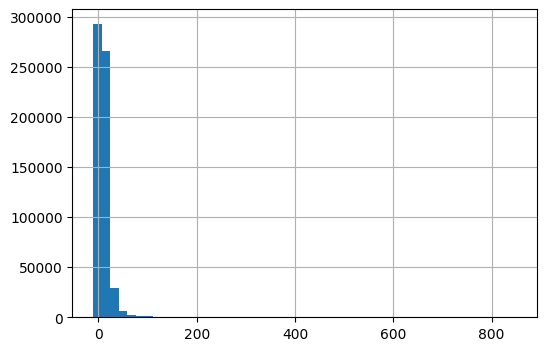

In [5]:
df['sample_measurement'].hist(bins=50, figsize=(6,4))


In [6]:
# Identify constant columns (1 unique value)
unique_counts = df.nunique().sort_values()
cols_one_value = unique_counts[unique_counts == 1].index.tolist()

# Identify completely NA columns
cols_all_na = df.columns[df.isna().all()].tolist()

# Additional known redundant columns
redundant_cols = [
    'units_of_measure', 'units_of_measure_code',
    'sample_duration', 'sample_duration_code',
    'sample_frequency', 'detection_limit',
    'method_type', 'method', 'method_code',
    'datum', 'parameter', 'parameter_code',
    'date_local', 'time_local',
    'cbsa_code', 'date_of_last_change',
    'state', 'county'
]

drop_candidates = set(cols_one_value + cols_all_na + redundant_cols)

df_clean = df.drop(columns=[c for c in drop_candidates if c in df.columns])
df_clean = df_clean.sort_values(['site_id', 'datetime']).reset_index(drop=True)

df_clean.head()


,county_code,site_number,poc,latitude,longitude,date_gmt,time_gmt,sample_measurement,qualifier,site_id,site_name,datetime
0,001,0013,3,37.864767,-122.302741,2020-01-01,08:00,24.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 08:00:00
1,001,0013,3,37.864767,-122.302741,2020-01-01,09:00,27.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 09:00:00
2,001,0013,3,37.864767,-122.302741,2020-01-01,10:00,17.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 10:00:00
3,001,0013,3,37.864767,-122.302741,2020-01-01,11:00,14.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 11:00:00
4,001,0013,3,37.864767,-122.302741,2020-01-01,12:00,12.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 12:00:00


In [7]:
# "qualifier" mask

pm = df_clean['sample_measurement']
qual = df_clean['qualifier']

hard_fail = qual.isin([
    "AM - Miscellaneous Void.",
    "AN - Machine Malfunction.",
    "AT - Calibration.",
    "AV - Power Failure.",
    "BK - Site computer/data logger down.",
    "BL - QA Audit.",
    "AD - Shelter Storm Damage."
])

soft_fail = qual.isin([
    "DA - Aberrant Data (Corrupt Files, Aberrant Chromatography, Spikes, Shifts).",
    "AI - Insufficient Data (cannot calculate)."
])

low_quality = qual.isin(["QX - Does not meet QC criteria."])

df_clean['pm_filled'] = df_clean['sample_measurement'].copy()

pm_na = pm.isna()
unknown_fail = pm_na & qual.isna()

soft_like = soft_fail & pm_na
hard_like = (hard_fail & pm_na) | unknown_fail


In [8]:
# interpolation run, site by site

df_clean['pm_filled'] = df_clean['sample_measurement']

# empty column for filled values
pm_filled_final = []

for sid, group in df_clean.groupby('site_id'):
    g = group.copy()

    # build masks inside this group
    g_pm_na = g['sample_measurement'].isna()
    g_unknown = g_pm_na & g['qualifier'].isna()

    g_soft = soft_fail.loc[g.index] & g_pm_na
    g_hard = (hard_fail.loc[g.index] & g_pm_na) | g_unknown

    # soft interpolation (≤6 hrs)
    pm_soft = g['pm_filled'].interpolate(
        method='linear', limit=6, limit_direction='both'
    )
    g.loc[g_soft, 'pm_filled'] = pm_soft.loc[g_soft]

    # hard interpolation (≤2 hrs)
    pm_hard = g['pm_filled'].interpolate(
        method='linear', limit=2, limit_direction='both'
    )
    g.loc[g_hard, 'pm_filled'] = pm_hard.loc[g_hard]

    pm_filled_final.append(g)

df_clean = pd.concat(pm_filled_final).sort_values(['site_id','datetime']).reset_index(drop=True)


In [9]:
# output mark and qc_weight

df_clean['was_imputed'] = (
    df_clean['sample_measurement'].isna() &
    df_clean['pm_filled'].notna()
).astype(int)

df_clean['qc_weight'] = 1.0
df_clean.loc[low_quality, 'qc_weight'] = 0.5
df_clean.loc[df_clean['was_imputed'] == 1, 'qc_weight'] *= 0.7


In [10]:
df_clean

,county_code,site_number,poc,latitude,longitude,date_gmt,time_gmt,sample_measurement,qualifier,site_id,site_name,datetime,pm_filled,was_imputed,qc_weight
0,001,0013,3,37.864767,-122.302741,2020-01-01,08:00,24.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 08:00:00,24.0,0,1.0
1,001,0013,3,37.864767,-122.302741,2020-01-01,09:00,27.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 09:00:00,27.0,0,1.0
2,001,0013,3,37.864767,-122.302741,2020-01-01,10:00,17.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 10:00:00,17.0,0,1.0
3,001,0013,3,37.864767,-122.302741,2020-01-01,11:00,14.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 11:00:00,14.0,0,1.0
4,001,0013,3,37.864767,-122.302741,2020-01-01,12:00,12.0,NaN,06-001-0013-3,Berkeley- Aquatic Park,2020-01-01 12:00:00,12.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635154,103,0007,3,40.170930,-122.255560,2025-01-01,03:00,4.9,NaN,06-103-0007-3,Red Bluff-Walnut St. District Office,2025-01-01 03:00:00,4.9,0,1.0
635155,103,0007,3,40.170930,-122.255560,2025-01-01,04:00,16.0,NaN,06-103-0007-3,Red Bluff-Walnut St. District Office,2025-01-01 04:00:00,16.0,0,1.0
635156,103,0007,3,40.170930,-122.255560,2025-01-01,05:00,29.5,NaN,06-103-0007-3,Red Bluff-Walnut St. District Office,2025-01-01 05:00:00,29.5,0,1.0
635157,103,0007,3,40.170930,-122.255560,2025-01-01,06:00,11.0,NaN,06-103-0007-3,Red Bluff-Walnut St. District Office,2025-01-01 06:00:00,11.0,0,1.0


In [12]:
# visualization for each site

import matplotlib.pyplot as plt

def plot_pm_comparison(site_id, days=7, start_date=None):
    """
    Plot raw vs filled PM2.5 for a given site_id.
    Optionally specify number of days or a start_date.
    """

    site_df = df_clean[df_clean['site_id'] == site_id].copy()
    site_df = site_df.sort_values('datetime')

    if start_date is not None:
        mask = (site_df['datetime'] >= pd.to_datetime(start_date)) & \
               (site_df['datetime'] < pd.to_datetime(start_date) + pd.Timedelta(days=days))
        plot_df = site_df[mask]
    else:
        # default: last 7 days
        plot_df = site_df.iloc[-24*days:]

    plt.figure(figsize=(14,5))
    plt.plot(plot_df['datetime'], plot_df['sample_measurement'], label='Raw PM2.5', alpha=0.5)
    plt.plot(plot_df['datetime'], plot_df['pm_filled'], label='Filled PM2.5', linewidth=2)

    plt.title(f"PM2.5 Raw vs Filled — Site {site_id}")
    plt.xlabel("Datetime")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.legend()
    plt.grid(True)
    plt.show()


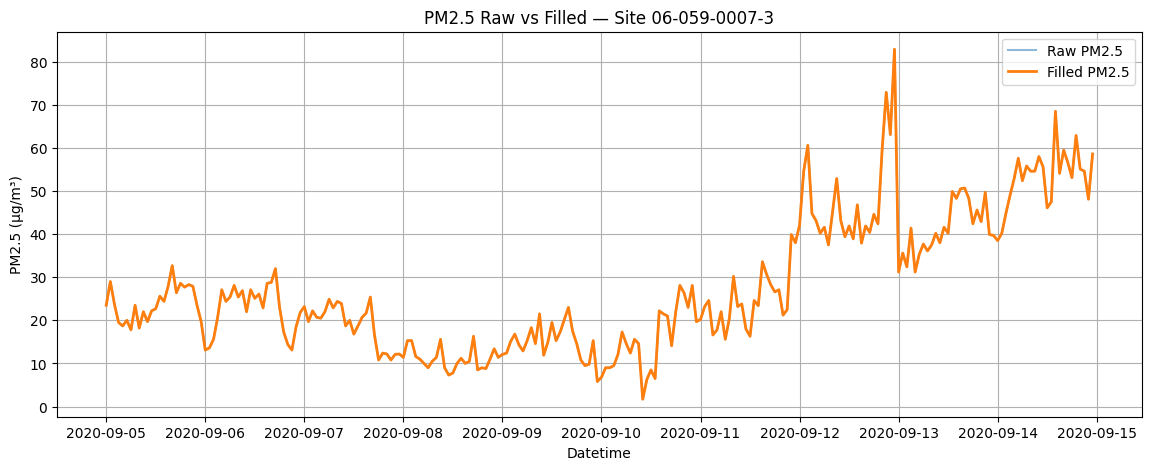

In [13]:
# enter site id and days number to see the plot

plot_pm_comparison("06-059-0007-3", days=10, start_date="2020-09-05")


In [14]:
# NA info per site 

import numpy as np

site_stats = []

for sid, g in df_clean.groupby('site_id'):
    g = g.sort_values('datetime')

    total = len(g)
    pm_missing = g['sample_measurement'].isna().sum() / total
    qual_missing = g['qualifier'].isna().sum() / total

    soft_count = (soft_fail.loc[g.index] & g['sample_measurement'].isna()).sum()
    hard_count = (hard_fail.loc[g.index] & g['sample_measurement'].isna()).sum()
    unknown_count = (g['sample_measurement'].isna() & g['qualifier'].isna()).sum()
    
    imputed_count = g['was_imputed'].sum()

    # count long hard outages (≥3 consecutive NA)
    long_outages = 0
    current_run = 0

    for missing, is_hardlike in zip(
        g['sample_measurement'].isna(),
        ((hard_fail.loc[g.index] & g['sample_measurement'].isna()) | (g['sample_measurement'].isna() & g['qualifier'].isna()))
    ):
        if missing and is_hardlike:
            current_run += 1
        else:
            if current_run >= 3:
                long_outages += 1
            current_run = 0
    if current_run >= 3:
        long_outages += 1

    site_stats.append({
        'site_id': sid,
        'missing_pm_%': pm_missing * 100,
        'missing_qualifier_%': qual_missing * 100,
        'soft_fail_missing': soft_count,
        'hard_fail_missing': hard_count,
        'unknown_missing': unknown_count,
        'imputed_count': imputed_count,
        'long_hard_outages': long_outages
    })

stats_df = pd.DataFrame(site_stats)
stats_df = stats_df.sort_values('missing_pm_%', ascending=False)
stats_df


,site_id,missing_pm_%,missing_qualifier_%,soft_fail_missing,hard_fail_missing,unknown_missing,imputed_count,long_hard_outages
0,06-001-0013-3,22.123194,45.453992,29,6812,0,362,57
6,06-037-4008-3,12.112297,87.810162,0,4411,0,83,16
13,06-085-0002-3,8.415095,91.568668,164,2748,0,408,24
2,06-013-0002-3,4.908199,92.186110,8,937,0,323,26
11,06-075-0005-3,4.723242,95.274477,10,1680,0,248,25
12,06-077-2010-3,4.358735,82.019935,8,875,0,55,7
4,06-029-0010-3,4.321561,65.706320,4,153,0,15,3
9,06-061-0003-1,4.187288,90.731407,0,498,0,209,36
15,06-103-0007-3,4.028869,80.042938,0,490,0,116,16
1,06-007-0008-3,3.525707,61.675909,1,546,0,81,11


In [15]:
stats_df.shape

(16, 8)

# Stationarity check for each site

In [16]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import pandas as pd

In [17]:
results = []

for sid, g in df_clean.groupby("site_id"):
    # use filled PM2.5 (best for stationarity evaluation)
    series = g.sort_values("datetime")["pm_filled"].dropna()

    # Must have enough data
    if len(series) < 200:
        results.append({
            "site_id": sid,
            "adf_p": np.nan,
            "kpss_p": np.nan,
            "acf_lag1": np.nan,
            "acf_strength": np.nan,
            "pacf_strength": np.nan
        })
        continue
    
    # --- ADF test ---
    try:
        adf_p = adfuller(series)[1]
    except:
        adf_p = np.nan

    # --- KPSS test ---
    try:
        kpss_p = kpss(series, nlags="auto")[1]
    except:
        kpss_p = np.nan

    # --- ACF & PACF summaries ---
    acf_vals = acf(series, nlags=20, fft=False)
    pacf_vals = pacf(series, nlags=20)
    
    lag1 = acf_vals[1]         # autocorrelation at lag=1
    acf_strength = np.sum(np.abs(acf_vals[1:]))   # overall dependency
    pacf_strength = np.sum(np.abs(pacf_vals[1:]))

    results.append({
        "site_id": sid,
        "adf_p": adf_p,
        "kpss_p": kpss_p,
        "acf_lag1": lag1,
        "acf_strength": acf_strength,
        "pacf_strength": pacf_strength
    })

stationarity_df = pd.DataFrame(results)
stationarity_df = stationarity_df.sort_values("acf_strength", ascending=False)

stationarity_df

/var/folders/vq/njtfhfys07xb0tbx1f677q_c0000gn/T/ipykernel_90507/3703034199.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(series, nlags="auto")[1]
/var/folders/vq/njtfhfys07xb0tbx1f677q_c0000gn/T/ipykernel_90507/3703034199.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(series, nlags="auto")[1]
/var/folders/vq/njtfhfys07xb0tbx1f677q_c0000gn/T/ipykernel_90507/3703034199.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(series, nlags="auto")[1]
/var/folders/vq/njtfhfys07xb0tbx1f677q_c0000gn/T/ipykernel_90507/3703034199.py:27: InterpolationWarning: The test statistic is 

,site_id,adf_p,kpss_p,acf_lag1,acf_strength,pacf_strength
0,06-001-0013-3,2.540250e-20,0.040492,0.933975,15.455810,1.679438
7,06-039-2010-3,6.119863e-25,0.010000,0.937892,14.875887,1.804534
11,06-075-0005-3,1.987004e-26,0.010000,0.931272,14.717792,1.623529
12,06-077-2010-3,2.887418e-24,0.010000,0.937603,14.567240,1.670206
3,06-019-0011-3,1.008128e-25,0.010000,0.933009,14.419819,1.846573
2,06-013-0002-3,1.141860e-27,0.010000,0.928999,13.843728,1.791259
14,06-099-0006-3,1.694971e-25,0.010000,0.915673,13.823090,1.754778
15,06-103-0007-3,4.503547e-23,0.010000,0.926173,12.741893,1.672766
1,06-007-0008-3,1.384849e-25,0.010000,0.933301,12.647399,1.871956
4,06-029-0010-3,3.295711e-14,0.100000,0.853548,12.077747,1.949624


Interpretting law:
1. adf_p -> p-value for adf test, if < 0.05 then reject so stationary
2. kpss_p -> p_value for kpss test, if < 0.05, then reject so non-stationary
3. if adf_p and kpss_p both say non-stationary, then need differencing 
4. if adf says stationary and kpss says non-stationary, then it is trend-stationary
5. acf_lag 1: close to 0 meaning probably stationary
6. acf_strength, which is the sum of abs lag 1-20 -> high means long memory means need differencing 
7. pacf_strengh, for determing AR order, more spikes higher AR order 

Conclusion:
1. ADF extremely small -> stationary
2. KPSS ~ 0.01 reject -> non-statrionary
3. ADF + KPSS -> trend-stationary
4. ACF_lag1 close to 1 -> high hourly autocorrelation -> slow decay of temporal dependence
5. ACF_stength high -> long memory, slow decay in ACF lags even after NA fillings
6. PACF_strength suggests AR order around 1~2 for most sites 


-> seasonaly adjusted is appropriate, seasonal ARIMA may help for 24h cyles, not purely white noise 

start with ARIMA(1,0,0) or ARIMA(2,0,0)

In [18]:
df_clean.to_csv("pm25_cleaned_multisite.csv", index=False)
